In [1]:
import sklearn as sk
from sklearn import svm
import pandas as pd
from sklearn.svm import SVC

In [2]:
file= open("q3_dataset.txt")
data_text= file.read()
lines= data_text.split("\n")
data_x= []
data_y=[]
for line in lines:
    if len(line)>0:
        arr=line.split()
        data_y.append(float(arr[0]))
        data_x.append([int(arr[1]), int(arr[2])])
print(data_x)
print(data_y)

[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [1, 9], [1, 10], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [3, 9], [3, 10], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9], [4, 10], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [7, 9], [7, 10], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8], [8, 9], [8, 10], [9, 1], [9, 2], [9, 3], [9, 4], [9, 5], [9, 6], [9, 7], [9, 8], [9, 9], [9, 10], [10, 1], [10, 2], [10, 3], [10, 4], [10, 5], [10, 6], [10, 7], [10, 8], [10, 9], [10, 10], [5, 3], [6, 8]]
[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

In [3]:
m1= svm.SVC(kernel = 'linear')
m1.fit(data_x,data_y)
predict_m1= m1.predict(data_x)
print(predict_m1)

m2= svm.SVC(kernel = 'linear', C=3.0)
m2.fit(data_x,data_y)
predict_m2= m2.predict(data_x)
print(predict_m2)

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.]


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
with open('/content/drive/MyDrive/3_Cisc484_MachineLearning/Homework4/question2b_prediction_m1.txt', mode='wt', encoding='utf-8') as myfile1:
    for num in predict_m1:
        myfile1.write(str(num)+ "\n")

with open('/content/drive/MyDrive/3_Cisc484_MachineLearning/Homework4/question2b_prediction_m2.txt', mode='wt', encoding='utf-8') as myfile2:
    for num in predict_m2:
        myfile2.write(str(num)+ "\n")

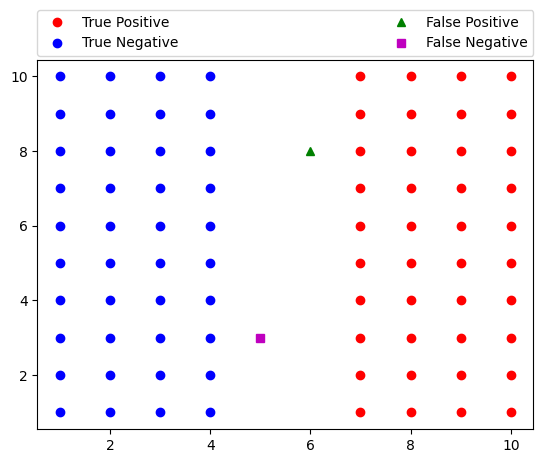

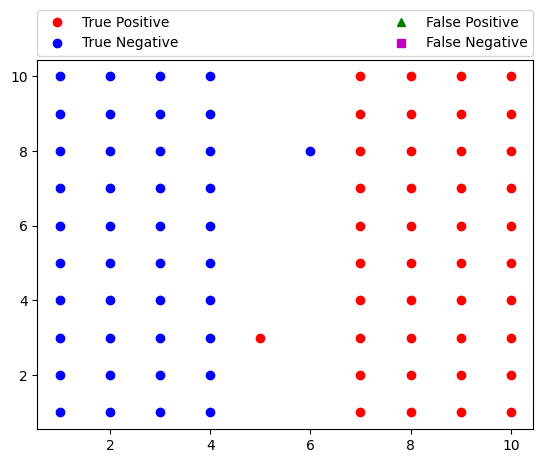

In [6]:
import sys
import matplotlib.pyplot as pl

try:
	DATASET = sys.argv[1]
	PREDICT = sys.argv[2]
except:
	print("Error! Use the command: python plot.py [Test_set] [prediction_file]")
################################################################################

# Read dataset and return 3 lists corresponding to classification, x and y
def opendataset(dataset):

    fid = open(dataset,'r')

    c = []
    x = []
    y = []

    for line in fid:
        c.append(float(line.split()[0]))
        x.append(float(line.split()[1]))
        y.append(float(line.split()[2]))

    fid.close()

    return c,x,y

# Read predict output
def openpredict(predictfile):

    fid = open(predictfile,'r')

    predict = []

    for line in fid:
        predict.append(float(line))

    return predict

# Show plot
def showplot(c,x,y,predict):

    x_tp, x_tn, y_tp, y_tn = [],[],[],[]
    x_fp, x_fn, y_fp, y_fn = [],[],[],[]

    # Confusion matrix
    for i in range(len(c)):
        if c[i] > 0 and predict[i] > 0:
            x_tp.append(x[i])
            y_tp.append(y[i])
        elif c[i] < 0 and predict[i] < 0:
            x_tn.append(x[i])
            y_tn.append(y[i])
        elif c[i] < 0 and predict[i] > 0:
            x_fp.append(x[i])
            y_fp.append(y[i])
        elif c[i] > 0 and predict[i] < 0:
            x_fn.append(x[i])
            y_fn.append(y[i])
        else:
            print('Error! Check your predict file!')

    p_tp, = pl.plot(x_tp,y_tp,'ro') # True positive -> Red dot
    p_tn, = pl.plot(x_tn,y_tn,'bo') # True negative -> Blue dot
    p_fp, = pl.plot(x_fp,y_fp,'g^') # False positive -> Green triangle
    p_fn, = pl.plot(x_fn,y_fn,'ms') # False negative -> magenta square

    pl.legend([p_tp, p_tn, p_fp, p_fn],
              ['True Positive', 'True Negative','False Positive','False Negative'],
              loc = 3,
              ncol = 2,
              mode = 'expand',
              numpoints=1,
              borderaxespad=0.,
              bbox_to_anchor=(0., 1.01, 1., .102))


    pl.show()

    return None

def main():
    DATASET = "q3_dataset.txt"
    PREDICT = "/content/drive/MyDrive/3_Cisc484_MachineLearning/Homework4/question2b_prediction_m1.txt"
    c,x,y = opendataset(DATASET)
    p = openpredict(PREDICT)
    showplot(c,x,y,p)

    PREDICT = "/content/drive/MyDrive/3_Cisc484_MachineLearning/Homework4/question2b_prediction_m2.txt"
    c,x,y = opendataset(DATASET)
    p = openpredict(PREDICT)
    showplot(c,x,y,p)



main()